# Long Short-Term Memory Machine Learning Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.losses import MeanSquaredError

!pip install tensorflow-addons
from tensorflow_addons.metrics import RSquare

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load your dataset into a pandas

# ------------------------------- ATTEMPT 1 -------------------------------
df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset.csv'
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date).csv'
# -------------------------------------------------------------------------

# ------------------------------- ATTEMPT 2 -------------------------------
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended.csv'
# df_file_path = folder_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended (Date).csv'
# -------------------------------------------------------------------------

df = pd.read_csv(df_file_path)

df.head()
# print(df.info())

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Normalize columns (except LE)
scaler = MinMaxScaler()

# ----------- Without Date -----------
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
# ------------------------------------

# ------------- With Date ------------
# df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
# ------------------------------------

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Split the dataset into train, validation, and test sets (using the same splits)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

In [ ]:
# Calculate the mean of the 'Daily LE' column
mean_daily_le = train_data['Daily LE'].mean()

In [ ]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(df.shape[1] - 1, 1)))  # Input shape for LSTM: (time_steps, input_features)
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError(), RSquare()])

In [ ]:
# Prepare the data for training (reshape for LSTM)
X_train = train_data.iloc[:, 1:].values.reshape(-1, df.shape[1] - 1, 1)  # Reshape with (time_steps, input_features)
y_train = train_data['Daily LE'].values

X_val = val_data.iloc[:, 1:].values.reshape(-1, df.shape[1] - 1, 1)
y_val = val_data['Daily LE'].values

X_test = test_data.iloc[:, 1:].values.reshape(-1, df.shape[1] - 1, 1)
y_test = test_data['Daily LE'].values

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
169/169 [==============================] - 7s 30ms/step - loss: 7596187136.0000 - mean_absolute_error: 51807.6562 - r_square: -1829.2073 - val_loss: 250175856.0000 - val_mean_absolute_error: 15686.9971 - val_r_square: -60.1371
Epoch 2/50
169/169 [==============================] - 10s 61ms/step - loss: 3734974208.0000 - mean_absolute_error: 29761.4395 - r_square: -898.8964 - val_loss: 42621340.0000 - val_mean_absolute_error: 5985.4849 - val_r_square: -9.4156
Epoch 3/50
169/169 [==============================] - 10s 58ms/step - loss: 2182244608.0000 - mean_absolute_error: 30301.0996 - r_square: -524.7851 - val_loss: 355677312.0000 - val_mean_absolute_error: 18750.4551 - val_r_square: -85.9191
Epoch 4/50
169/169 [==============================] - 11s 63ms/step - loss: 16968446.0000 - mean_absolute_error: 2639.8267 - r_square: -3.0883 - val_loss: 4159143.0000 - val_mean_absolute_error: 1540.5273 - val_r_square: -0.0164
Epoch 5/50
169/169 [==============================] - 9s 55m

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae, test_r_squared = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}, Test R-squared: {test_r_squared}")

47/47 [==============================] - 1s 18ms/step - loss: 4471760.0000 - mean_absolute_error: 1808.3127 - r_square: -0.1121
Test Loss: 4471760.0, Test MAE: 1808.312744140625, Test R-squared: -0.11214816570281982


In [ ]:
# Calculate normalized performance metrics
normalized_test_loss = test_loss / mean_daily_le
normalized_test_mae = test_mae / mean_daily_le

print(f"Normalized Test Loss: {normalized_test_loss * 100}%")
print(f"Normalized Test MAE: {normalized_test_mae * 100}%")

Normalized Test Loss: 197929.04414766934%
Normalized Test MAE: 80.03953990549645%


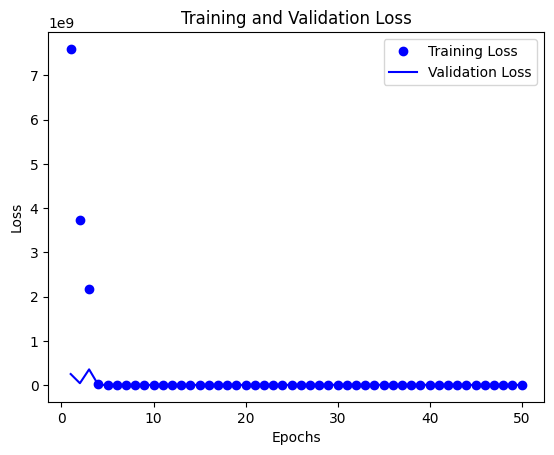

In [ ]:
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

47/47 [==============================] - 1s 15ms/step


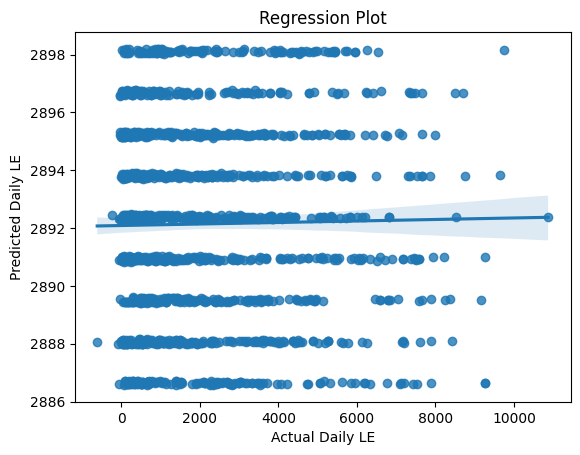

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a regression plot
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Daily LE')
plt.ylabel('Predicted Daily LE')
plt.title('Regression Plot')
plt.show()